##### Standardization(Why standardization?)
Standardization comes into picture when features of input data set have large differences between their ranges, or simply when they are measured in different measurement units (e.g., Pounds, Meters, Miles … etc).

We try to bring all the variables or features to a similar scale. standarisation means centering the variable at zero.
z=(x-x_mean)/std

In [1]:
import pandas as pd
df = pd.read_csv(r"D:\data ML\Datasets\titanic_train.csv", usecols=['pclass','age','fare','survived'])
df.head()

,pclass,age,fare,survived
0,3,NaN,7.7333,1
1,3,38.0,8.6625,0
2,3,30.0,24.1500,0
3,2,54.0,23.0000,1
4,2,40.0,13.0000,0


In [2]:
# there are some nun value in age col

df['age'].isnull().sum()

174

In [3]:
df['age'].fillna(df.age.median(),inplace = True)

In [4]:
df['age'].isnull().sum()

0

In [9]:
### Independent and dependent features
# .iloc[start_row:end_row,start_col:end_col]
X = df.iloc[:,0:3]
y = df.iloc[:,3:]

In [6]:
print(X)


     pclass   age     fare
0         3  28.0   7.7333
1         3  38.0   8.6625
2         3  30.0  24.1500
3         2  54.0  23.0000
4         2  40.0  13.0000
..      ...   ...      ...
845       1  55.0  50.0000
846       1  58.0  29.7000
847       2  24.0  26.0000
848       3   3.0  13.7750
849       2  52.0  13.0000

[850 rows x 3 columns]


In [10]:
print(y)

     survived
0           1
1           0
2           0
3           1
4           0
..        ...
845         0
846         0
847         1
848         0
849         0

[850 rows x 1 columns]


In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [12]:
X_train

,pclass,age,fare
709,3,30.0,8.6625
827,3,31.0,7.7750
453,1,28.0,25.7417
24,3,18.0,8.0500
316,3,33.0,9.5000
...,...,...,...
71,2,39.0,13.0000
106,2,36.0,13.0000
270,3,35.0,8.0500
435,3,28.0,56.4958


* STANDARSCALER convert all the value of X based on z-score transformation.
* fit_transform  =  apply the z score formula for every column seprately (xi - mu)/S.D

In [13]:
#### standarisation: We use the Standardscaler from sklearn library
from sklearn.preprocessing import StandardScaler

In [14]:
scaler = StandardScaler()
### fit vs fit_transform
X_train_scaled=scaler.fit_transform(X_train)

In [15]:
X_train_scaled
# mean = 0 AND S.D =1

array([[ 0.81885985,  0.06550022, -0.51987832],
       [ 0.81885985,  0.14368824, -0.53988122],
       [-1.60156225, -0.09087582, -0.13493925],
       ...,
       [ 0.81885985,  0.45644032, -0.53368314],
       [ 0.81885985, -0.09087582,  0.55821119],
       [ 0.81885985, -0.09087582, -0.51987832]])

In [16]:
X_test_scaled=scaler.transform(X_test)

In [17]:
X_test_scaled

array([[ 8.18859847e-01, -9.50944039e-01, -5.52182717e-01],
       [ 8.18859847e-01, -9.08758195e-02, -5.40821073e-01],
       [ 8.18859847e-01, -1.02913206e+00, -5.01002354e-01],
       [-3.91351200e-01, -1.26877995e-02, -4.78463882e-01],
       [-3.91351200e-01, -1.26877995e-02, -1.29117559e-01],
       [ 8.18859847e-01,  6.12816360e-01, -5.40444681e-01],
       [-1.60156225e+00,  2.33295280e+00,  4.45144686e-01],
       [-3.91351200e-01, -1.26877995e-02, -9.03333561e-02],
       [-1.60156225e+00,  4.56440320e-01,  1.08319997e+01],
       [ 8.18859847e-01,  1.43688241e-01, -3.09425339e-01],
       [-1.60156225e+00, -9.08758195e-02, -1.16721400e-01],
       [-1.60156225e+00,  2.41114082e+00, -1.16721400e-01],
       [ 8.18859847e-01, -9.08758195e-02, -1.86590664e-01],
       [ 8.18859847e-01, -6.38191959e-01, -5.25044143e-01],
       [-1.60156225e+00,  1.23832052e+00,  6.23667419e-01],
       [-1.60156225e+00,  2.21876261e-01, -2.76944337e-02],
       [ 8.18859847e-01,  3.00064281e-01

#### Guassian Transformation

Some machine learning algorithms like linear and logistic assume that the features are normally distributed
-Accuracy
-Performance
- logarithmic transformation
- reciprocal transformation
- square root transformation
- exponential transformation (more general, you can use any exponent)
- boxcox transformation

In [18]:
df = pd.read_csv(r"D:\data ML\Datasets\titanic_train.csv", usecols=['pclass','age','fare','survived'])
df.head()

,pclass,age,fare,survived
0,3,NaN,7.7333,1
1,3,38.0,8.6625,0
2,3,30.0,24.1500,0
3,2,54.0,23.0000,1
4,2,40.0,13.0000,0


In [19]:
df.isnull().sum()

pclass        0
age         174
fare          1
survived      0
dtype: int64

In [20]:
df['age'].fillna(df.age.median(), inplace =True)

In [21]:
df['age'].isnull().sum()

0

In [22]:
import matplotlib.pyplot as plt
import scipy.stats as stat
import pylab 

In [23]:
# most of the ml algorithms give good accuracy if the dataset is normally distributed, 
# so check the data is normally distributed or not we use Q-Q plot

In [24]:
#### If you want to check whether feature is guassian or normal distributed
#### Q-Q plot
def plot_data(df,feature):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    df[feature].hist()
    plt.subplot(1,2,2)
    stat.probplot(df[feature],dist='norm',plot=pylab)
    plt.show()

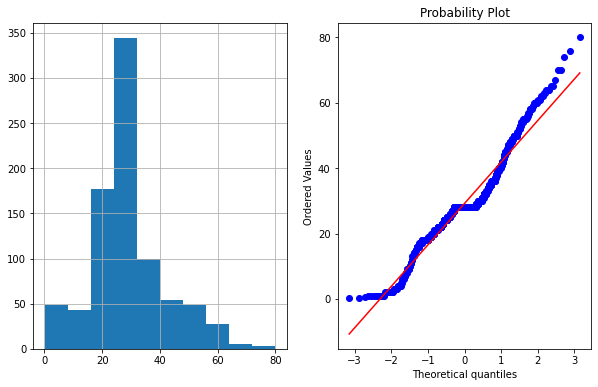

In [25]:
plot_data(df,'age')
# from the below plot it is shown that the data is not normally distributed

## Apply the transformation techniques

#### Logarithmic Transformation

In [26]:
import numpy as np


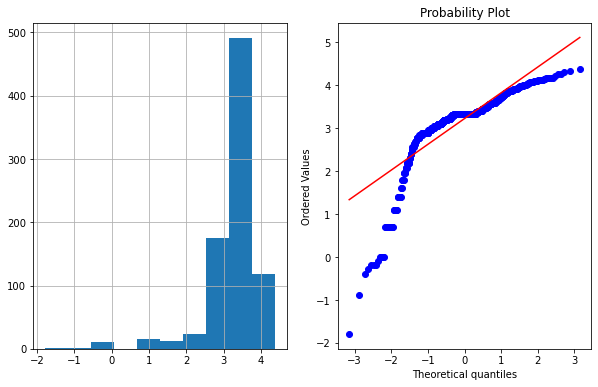

In [27]:
df['age_log'] = np.log(df['age'])
plot_data(df,'age_log')
# by doing logrithmic it is not normally distributed use another techniques 

#### Reciprocal Trnasformation

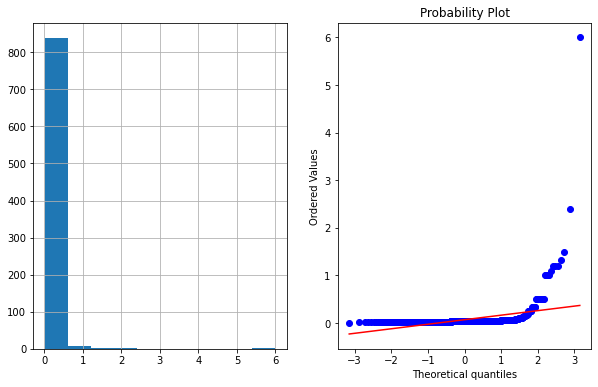

In [28]:
df['age_reciprocal'] = 1/df['age']
plot_data(df,'age_reciprocal')
# again by doing reciprocal it is not normally distributed use another techniques 

##### Square Root Transformation

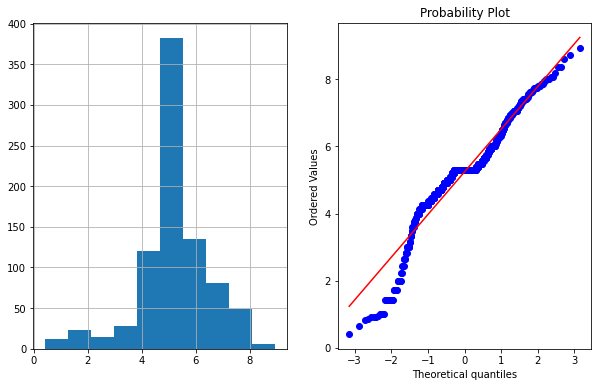

In [29]:
df['age_sqrt'] = np.sqrt(df['age'])
plot_data(df,'age_sqrt')
# again by doing sqrt it is not normally distributed use another techniques 

#### Exponential Transformation

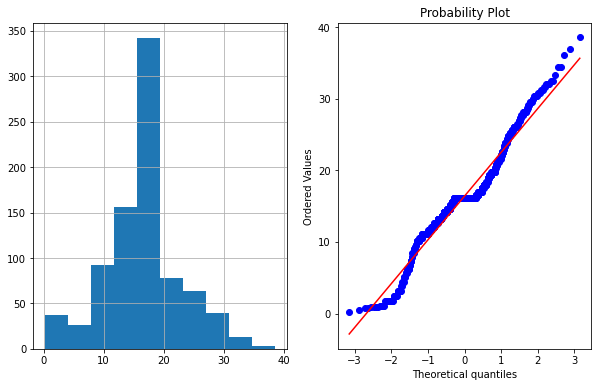

In [30]:
df['age_exponential'] = df.age**(1/1.2)
plot_data(df,'age_exponential')
# again by doing exponential it is not normally distributed use another techniques,  but somewhat normally fitted

#### BoxCOx Transformation
The Box-Cox transformation is defined as: 

T(Y)=(Y exp(λ)−1)/λ

* where Y is the response variable and λ is the transformation parameter. λ varies from -5 to 5. In the transformation, all values of λ  are considered and the optimal value for a given variable is selected.

In [31]:
df['age_BoxCox'], parameters = stat.boxcox(df['age'])

In [32]:
print(parameters)
# this is the value of alpha/lembda

0.7706329165332146


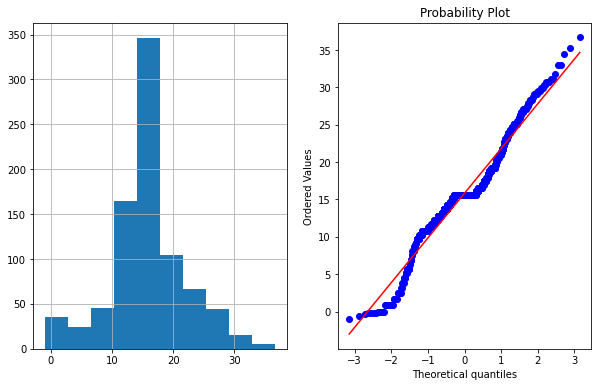

In [33]:
plot_data(df,'age_BoxCox')
# showing the data is much better normally distributed than any other transformation technique


In [39]:
def plot_data(df,feature):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    df[feature].hist()
    plt.subplot(1,2,2)
    stat.probplot(df[feature],dist ='norm',plot=pylab)
    plt.show()

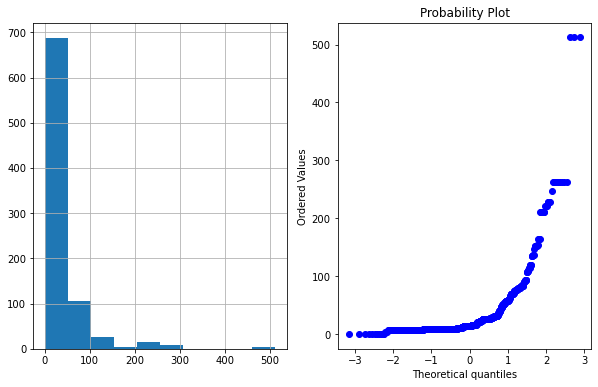

In [40]:
# lets check for the fare data - is it normally distributed or not
plot_data(df,'fare')

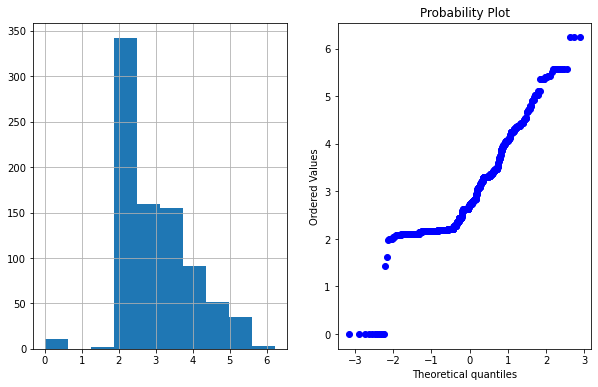

In [41]:
#### Fare
df['fare_log']=np.log1p(df['fare'])
plot_data(df,'fare_log')

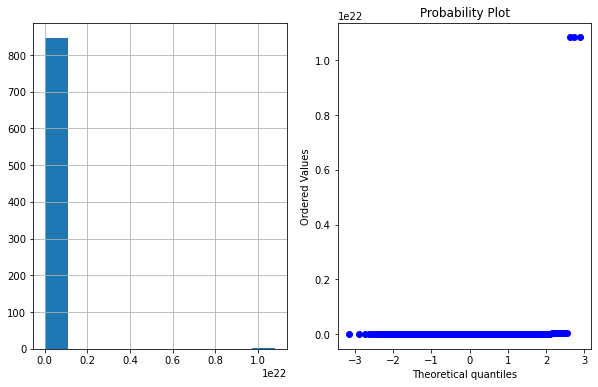

In [46]:
df['fare_Boxcox'],parameters=stat.boxcox(df['fare']+1)
plot_data(df,'fare_Boxcox')